In [39]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *
import matplotlib.patheffects as pe

path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]




m_a =  0.1 pressure_offset =  0.01 Number of LPlasmon events =  0.00048225969195669904
m_a =  0.1 pressure_offset =  0.1 Number of LPlasmon events =  0.0005704090747897794
m_a =  0.1 pressure_offset =  0.2 Number of LPlasmon events =  0.000719741597157153
m_a =  0.1 pressure_offset =  0.5 Number of LPlasmon events =  0.0017620597228606982
m_a =  0.1 pressure_offset =  0.9090909090909091 Number of LPlasmon events =  0.018989746570014177
m_a =  0.1 pressure_offset =  0.9999999000000099 Number of LPlasmon events =  0.03356952248577727


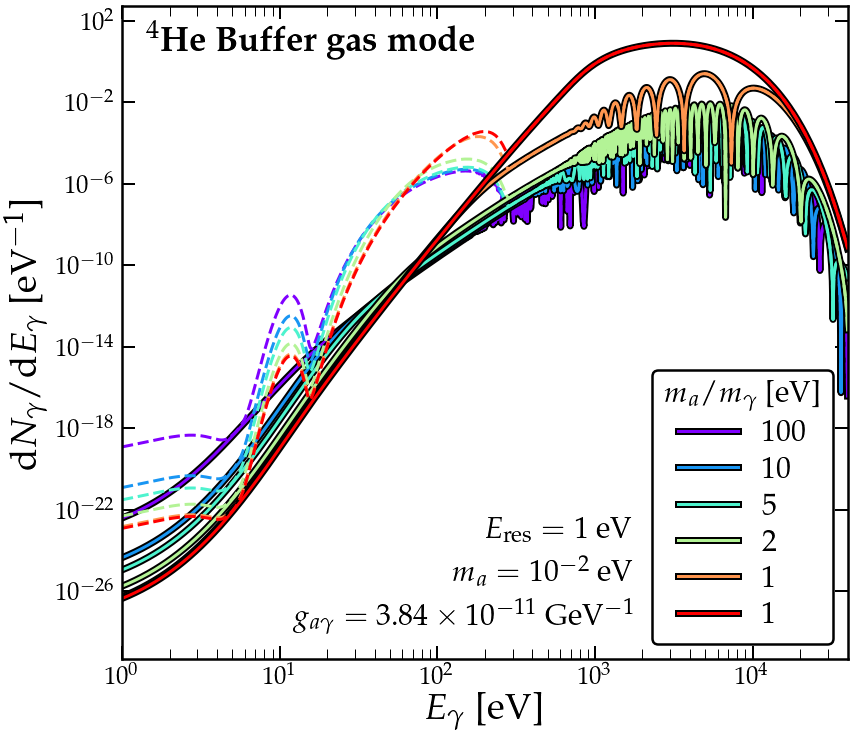

In [51]:
m_a = 1.0e-1
pos = 1/array([100,10,5,2,1.1,1.0000001])
T_operating = 1.8
labs = array(['100','10','5','2','1.1','1'])

g = 2e-10*m_a*1.92



fig,ax = MySquarePlot(r"$E_\gamma$ [eV]",r" ${\rm d}N_\gamma/{\rm d}E_\gamma$ [eV$^{-1}$]",lfs=37)

cols = cm.rainbow(linspace(0,1,size(pos)))

E_res = 1e-3
E_max = 40.0
nfine = 10
nE_bins = 1000
Ei = logspace(log10(E_res),log10(E_max),1000)

Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())

dN1_0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0,m_a,0.999999*(m_a)**2.0*T_operating/0.02,g=5e-11,Eres=Ei[0])
dN2_0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0+Flux10_1,m_a,0.999999*(m_a)**2.0*T_operating/0.02,g=5e-11,Eres=Ei[0])

    
for po,col,label in zip(pos,cols,labs):
    pressure = po*(m_a)**2.0*T_operating/0.02

    label = str(int(1/po))
    
    dN0 = PhotonNumber_gag_BufferGas(Ei,Flux10_0,m_a,pressure,g=g,Eres=Ei[0])
    plt.plot(Ei*1000,dN0/1000,'-',label=label,lw=3,color=col,path_effects=path_effects)
    
    dN = PhotonNumber_gag_BufferGas(Ei,Flux10_0+Flux10_1,m_a,pressure,g=g,Eres=Ei[0])
    plt.plot(Ei*1000,dN/1000,'--',lw=3,color=col)
    
    print('m_a = ',m_a,'pressure_offset = ',po,'Number of LPlasmon events = ',trapz(dN,Ei)-trapz(dN0,Ei))

plt.xlim(left=Ei[0]*1000)
plt.xlim(right=Ei[-1]*1000)
plt.ylim(bottom=5e-30,top=5e2)
plt.xscale('log')
plt.yscale('log')
leg = plt.legend(fontsize=30,frameon=True,title=r'$m_a/m_\gamma$ [eV]',loc="lower right",framealpha=1,edgecolor='k',labelspacing=0.2)
plt.setp(leg.get_title(),fontsize=30)
leg.get_frame().set_linewidth(2.5)

plt.gcf().text(0.67,0.26,r'$E_{\rm res} = 1$ eV',horizontalalignment='right',fontsize=30)
plt.gcf().text(0.67,0.21,r'$m_a = 10^{-2}$ eV',horizontalalignment='right',fontsize=30)
plt.gcf().text(0.67,0.16,r'$g_{a\gamma} = 3.84\times10^{-11}$ GeV$^{-1}$',horizontalalignment='right',fontsize=30)

#txt = CurvedText(x = Ei[500:3000]*1000,y = 1.1*dN1_0[500:3000]/1000,text=r'Primakoff',va = 'bottom',axes = ax,fontsize=30)
#plt.gcf().text(0.18,0.7,r'LPlasmon',fontsize=30,rotation=46)


plt.gcf().text(0.15,0.83,r'{\bf $^4$He Buffer gas mode}',fontsize=35)

MySaveFig(fig,'XraySpectrum_BufferGas')


In [43]:
g

3.8400000000000004e-11

In [37]:
1e-1/5e-2

2.0